1. Load and Preprocess the Data
You can use TensorFlow's ImageDataGenerator to load images from these directories. It will automatically label the images based on the folder names.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_width, img_height = 224, 224  # or whatever size your model expects

# Rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_dir = '/content/drive/MyDrive/DATASET/GENDER/train'
validation_data_dir = '/content/drive/MyDrive/DATASET/GENDER/test'
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # binary since you have two classes

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 220 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


2. Define Your Model
You can use a pre-trained model or build one from scratch. Here's an example using a simple CNN:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more layers as needed...

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


3. Train the Model
Now, train the model using the data from the generators.

In [ ]:
nb_train_samples = 222  # replace with your actual number of images
nb_validation_samples = 82  # replace with your actual number of images
epochs = 50

model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/50
6/6 [==============================] - 59s 10s/step - loss: 32.5365 - accuracy: 0.5426 - val_loss: 1.1367 - val_accuracy: 0.6667
Epoch 2/50
6/6 [==============================] - 35s 6s/step - loss: 5.1220 - accuracy: 0.5266 - val_loss: 1.1123 - val_accuracy: 0.3333
Epoch 3/50
6/6 [==============================] - 40s 7s/step - loss: 0.7666 - accuracy: 0.5106 - val_loss: 0.6928 - val_accuracy: 0.6333
Epoch 4/50
6/6 [==============================] - 38s 7s/step - loss: 1.1011 - accuracy: 0.5319 - val_loss: 0.6474 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 44s 8s/step - loss: 0.7658 - accuracy: 0.5213 - val_loss: 0.6923 - val_accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 51s 9s/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 7/50
6/6 [==============================] - 38s 6s/step - loss: 0.6932 - accuracy: 0.4894 - val_loss: 0.6923 - val_accuracy: 0.6667
Epoch 8/50
6/6 [================

4. Model Evaluation
After training, evaluate your model's performance on the test set.

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy:', accuracy)


2/2 [==============================] - 7s 3s/step - loss: 0.6931 - accuracy: 0.3500
Test accuracy: 0.3499999940395355



5. Save the Model
Optionally, you can save your model for later use.



In [ ]:
model.save('gender_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# TESTING THE MODEL

1. Load the Trained Model
If your model is not already loaded, you can load it using TensorFlow/Keras. Assuming you have saved your model as gender_classifier_model.h5, you would load it like this:

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('gender_classifier_model.h5')


2. Prepare Your Test Data
Similar to how you prepared your training data, you need to preprocess your test data. Make sure to use the same preprocessing steps (like resizing, normalization) as you did with the training data.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_dir = '/content/drive/MyDrive/DATASET/GENDER/test'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)  # Shuffle should be False for testing


Found 80 images belonging to 2 classes.


3. Evaluate the Model
Use the evaluate function to test the model on your test data. This will give you the loss and accuracy.

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Test Loss: {:.2f}".format(loss))


3/3 [==============================] - 16s 6s/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 50.00%
Test Loss: 0.69


4. Make Predictions and Analyze
For a more detailed analysis, you can make predictions on the test dataset and compare them with the actual labels. This can help you understand where your model is making mistakes.

In [ ]:
# Make predictions
predictions = model.predict(test_generator)
predicted_classes = predictions > 0.5  # since it's a binary classification

# Retrieve actual labels
actual_classes = test_generator.classes

# Analyze the results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(actual_classes, predicted_classes))
print(confusion_matrix(actual_classes, predicted_classes))


3/3 [==============================] - 10s 3s/step
              precision    recall  f1-score   support

           0       0.50      0.03      0.05        40
           1       0.50      0.97      0.66        40

    accuracy                           0.50        80
   macro avg       0.50      0.50      0.35        80
weighted avg       0.50      0.50      0.35        80

[[ 1 39]
 [ 1 39]]


5. Visualize Errors (Optional)
It's often helpful to visualize where the model is making errors. You can plot some misclassified images with their predicted and actual labels.

1/1 [==============================] - 1s 684ms/step


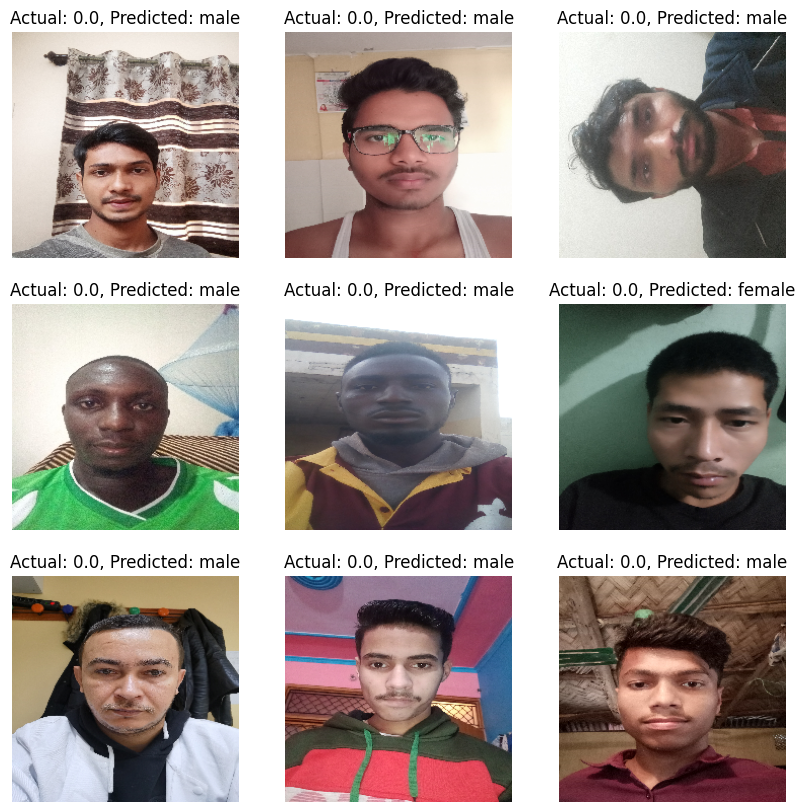

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images and labels
def plot_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Actual: {true_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Get some test images and labels
test_images, test_labels = next(test_generator)
predicted_labels = model.predict(test_images) > 0.5
predicted_labels = ['male' if label else 'female' for label in predicted_labels]


# Plot the results
plot_images(test_images, test_labels, predicted_labels)
